In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist

import tensorflow.keras.backend as K

In [39]:
#first we will load dataset

In [40]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [41]:
#Now we will se our dataset

print("Dimension of x_train",x_train.shape)
print("Dimension of x_test",x_test.shape)
print("Dimension of y_test",y_test.shape)

Dimension of x_train (60000, 28, 28)
Dimension of x_test (10000, 28, 28)
Dimension of y_test (10000,)


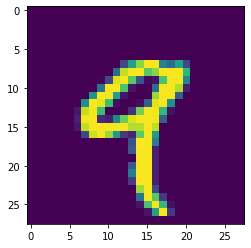

9


In [42]:
#we will see a single image in out dataset
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_train[4])
plt.show()
print(y_train[4])

In [43]:
#Now defining some parameters for our model

In [44]:
num_classes = 10
#as we have 10 classes (0-9) 
#we need to prdeict one out of 10 which has high probability
epochs = 30
img_rows = 28 
img_cols = 28
#as each image is 28 by 28 pixel

In [45]:
#normalizing image 
x_train =x_train.astype(float)
x_train =x_train/255
x_test =x_test.astype(float)
x_test =x_test/255
#y_train =y_train/255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test = to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [46]:
#format in which image are feed to our model 
#there are two cases possible either we can have channel first than image dimension
#or we can have dimension first than channel 
#we have one channel as it is a grey scale image therfore '1'
if K.image_data_format() =='channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
    input_shape = (1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)
    

In [48]:
#build our model
#BY DEFAULT STRIDE IS 1
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [49]:
#compile our model

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 32)          128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 32)         

In [52]:
#fit the model
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 38s 638us/sample - loss: 0.4194 - accuracy: 0.8753 - val_loss: 0.7520 - val_accuracy: 0.7056
Epoch 2/30
60000/60000 [==============================] - 42s 695us/sample - loss: 0.1178 - accuracy: 0.9689 - val_loss: 0.0510 - val_accuracy: 0.9827
Epoch 3/30
60000/60000 [==============================] - 35s 579us/sample - loss: 0.0803 - accuracy: 0.9780 - val_loss: 0.0377 - val_accuracy: 0.9872
Epoch 4/30
60000/60000 [==============================] - 39s 642us/sample - loss: 0.0612 - accuracy: 0.9832 - val_loss: 0.0392 - val_accuracy: 0.9889
Epoch 5/30
60000/60000 [==============================] - 44s 728us/sample - loss: 0.0526 - accuracy: 0.9855 - val_loss: 0.0264 - val_accuracy: 0.9912
Epoch 6/30
60000/60000 [==============================] - 43s 709us/sample - loss: 0.0457 - accuracy: 0.9875 - val_loss: 0.0266 - val_accuracy: 0.9911
Epoch 7/30
60000/60000 [====================

In [54]:
score ,acc = model.evaluate(x_test,y_test)
print("Score is :",score)
print("Accuracy :",acc)


10000/10000 [==============================] - 2s 224us/sample - loss: 0.0360 - accuracy: 0.9915
Score is : 0.03601376320495292
Accuracy : 0.9915


In [55]:
#save our model

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("models.h5")

In [57]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'/home/ubuntu/love/keras')